In [4]:
# Import 
import networkx as nx
import pandas as pd

In [5]:
edges_df = pd.read_csv('data/api_data/station_distances.csv')
edges_df.head()

,FromStationCode,ToStationCode,DistanceMiles,DistanceMinutes
0,A01,A02,0.75,2.0
1,A01,A03,1.23,4.0
2,A01,A04,2.40,6.0
3,A01,A05,3.10,9.0
4,A01,A06,3.73,11.0


In [6]:
edges_in_min = edges_df[['FromStationCode', 'ToStationCode', 'DistanceMinutes']]
edges_in_miles = edges_in_min = edges_df[['FromStationCode', 'ToStationCode', 'DistanceMiles']]

In [14]:
# Grab node location data'
station_list_path = 'data/api_data/station_list.xml'
node_locations = pd.read_xml(station_list_path, xpath='./wm:Stations/wm:Station', namespaces={'wm': 'http://www.wmata.com'})
node_locations = node_locations[['Code', 'Lat', 'Lon']]
node_locations.head()
pos = {code: (long, lat) for code, long, lat in zip(node_locations['Code'], node_locations['Lon'], node_locations['Lat'])}

In [16]:
# Create network graph from Edges in Minutes
G_minutes = nx.from_pandas_edgelist(edges_in_min, source='FromStationCode', target='ToStationCode', edge_attr=True)


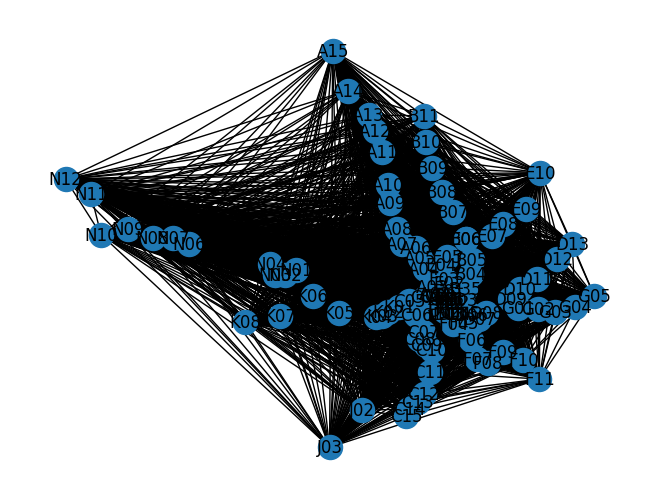

In [17]:
nx.draw(G_minutes, with_labels=True, pos=pos)